## Importing the necessary libraries for our analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#starting with loading the data into the program
data = pd.read_csv('train.csv')

In [3]:
#information on the features from the column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87182 entries, 0 to 87181
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     87182 non-null  int64  
 1   Product_ID                  87182 non-null  object 
 2   Gender                      87182 non-null  object 
 3   Age                         87182 non-null  object 
 4   Occupation                  87182 non-null  int64  
 5   City_Category               87182 non-null  object 
 6   Stay_In_Current_City_Years  87182 non-null  object 
 7   Marital_Status              87182 non-null  int64  
 8   Product_Category_1          87181 non-null  float64
 9   Product_Category_2          59965 non-null  float64
 10  Product_Category_3          26568 non-null  float64
 11  Purchase                    87181 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 8.0+ MB


In [4]:
#getting the first look at the data
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,NaN,NaN,7969.0


In [5]:
#column names
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
#label encoding on the categorical columns
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
data['User_ID'] = le.fit_transform(data['User_ID'])
print("User_ID", le.classes_)
data['Product_ID'] = le.fit_transform(data['Product_ID'])
print("Product_ID", le.classes_)
data['Gender'] = le.fit_transform(data['Gender'])
print("Gender", le.classes_)
data['Age'] = le.fit_transform(data['Age'])
print("Age", le.classes_)
data['City_Category'] = le.fit_transform(data['City_Category'])
print("City_Category", le.classes_)

User_ID [1000001 1000002 1000003 ... 1006037 1006039 1006040]
Product_ID ['P00000142' 'P00000242' 'P00000342' ... 'P0099742' 'P0099842' 'P0099942']
Gender ['F' 'M']
Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
City_Category ['A' 'B' 'C']


In [9]:
data['Age'].value_counts()

2    34606
3    17342
1    16294
4     7027
5     6049
6     3395
0     2469
Name: Age, dtype: int64

In [10]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [11]:
 #changing all the values for 4+ to 4
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+', '4')

In [12]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [13]:
#changing the datatype from string to integer
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87182 entries, 0 to 87181
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     87182 non-null  int64  
 1   Product_ID                  87182 non-null  int64  
 2   Gender                      87182 non-null  int64  
 3   Age                         87182 non-null  int64  
 4   Occupation                  87182 non-null  int64  
 5   City_Category               87182 non-null  int64  
 6   Stay_In_Current_City_Years  87182 non-null  int64  
 7   Marital_Status              87182 non-null  int64  
 8   Product_Category_1          87181 non-null  float64
 9   Product_Category_2          59965 non-null  float64
 10  Product_Category_3          26568 non-null  float64
 11  Purchase                    87181 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 8.0 MB


In [15]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,607,0,0,10,0,2,0,3.0,NaN,NaN,8370.0
1,0,2148,0,0,10,0,2,0,1.0,6.0,14.0,15200.0
2,0,756,0,0,10,0,2,0,12.0,NaN,NaN,1422.0
3,0,732,0,0,10,0,2,0,12.0,14.0,NaN,1057.0
4,1,2481,1,6,16,2,4,0,8.0,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87177,1391,824,0,2,3,0,1,0,6.0,16.0,NaN,12417.0
87178,1391,1073,0,2,3,0,1,0,1.0,11.0,NaN,11815.0
87179,1391,2271,0,2,3,0,1,0,1.0,11.0,16.0,7837.0
87180,1391,2705,0,2,3,0,1,0,8.0,NaN,NaN,8014.0


In [16]:
#checking the null values in the data
data.isna().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                1
Product_Category_2            27217
Product_Category_3            60614
Purchase                          1
dtype: int64

In [17]:
#since the data is large in size, dropping the null values
data = data.dropna()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26568 entries, 1 to 87179
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     26568 non-null  int64  
 1   Product_ID                  26568 non-null  int64  
 2   Gender                      26568 non-null  int64  
 3   Age                         26568 non-null  int64  
 4   Occupation                  26568 non-null  int64  
 5   City_Category               26568 non-null  int64  
 6   Stay_In_Current_City_Years  26568 non-null  int64  
 7   Marital_Status              26568 non-null  int64  
 8   Product_Category_1          26568 non-null  float64
 9   Product_Category_2          26568 non-null  float64
 10  Product_Category_3          26568 non-null  float64
 11  Purchase                    26568 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 2.6 MB


In [19]:
data.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,0,2148,0,0,10,0,2,0,1.0,6.0,14.0,15200.0
6,3,1566,1,4,7,1,2,1,1.0,8.0,17.0,19215.0
13,4,1211,1,2,20,0,1,1,1.0,2.0,5.0,15665.0
14,5,1991,0,5,9,0,1,0,5.0,8.0,14.0,5378.0
16,5,3242,0,5,9,0,1,0,2.0,3.0,4.0,13055.0
18,6,337,1,3,1,1,1,1,1.0,14.0,16.0,11788.0
19,7,2153,1,2,12,2,4,1,1.0,5.0,15.0,19614.0
24,7,2633,1,2,12,2,4,1,1.0,8.0,14.0,11927.0
28,8,679,1,2,17,2,0,0,5.0,8.0,14.0,5391.0
29,9,737,0,3,1,1,4,1,2.0,4.0,8.0,16352.0


In [20]:
#getting the five points summary
data.describe()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,26568.000000,26568.00000,26568.000000,26568.000000,26568.000000,26568.000000,26568.000000,26568.000000,26568.000000,26568.000000,26568.000000,26568.000000
mean,2652.189514,1324.42284,0.776762,2.436390,8.150933,1.082279,1.870446,0.401197,2.744091,6.918774,12.660230,11632.542118
std,1701.884793,850.79541,0.416425,1.345673,6.490325,0.760669,1.288452,0.490150,2.571689,4.506123,4.127872,5067.776706
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,1098.750000,679.00000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,2.000000,9.000000,7878.000000
50%,2605.000000,1195.00000,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,1.000000,6.000000,14.000000,11747.000000
75%,4101.250000,1906.00000,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,4.000000,10.000000,16.000000,15612.000000
max,5744.000000,3273.00000,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,15.000000,16.000000,18.000000,23958.000000


In [21]:
data['Age'].describe()

count    26568.000000
mean         2.436390
std          1.345673
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Age, dtype: float64

In [22]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [23]:
data['User_ID'].nunique()

4834

In [24]:
data.nunique()

User_ID                       4834
Product_ID                     517
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              12
Product_Category_2              14
Product_Category_3              15
Purchase                      9183
dtype: int64

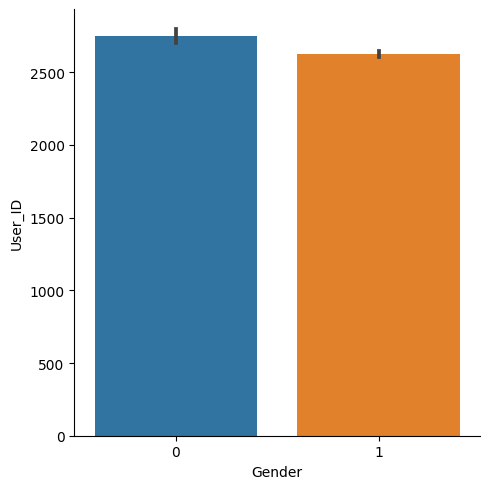

In [25]:
#visualizations to understand the distribution of the various features
sns.catplot(data=data, x='Gender', y='User_ID', kind='bar')

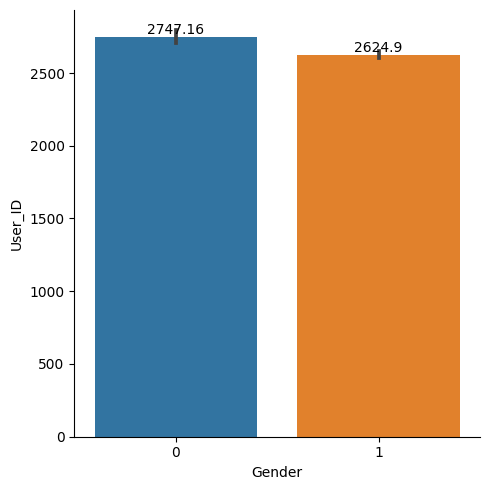

In [26]:
#visualizations to understand the distribution of the various features
cat = sns.catplot(data=data, x='Gender', y='User_ID', kind='bar')
for ax in cat.axes.flat:
    ax.bar_label(ax.containers[0])


### Amongst all the purshases made, majority of the purchases were made by Women/Female.

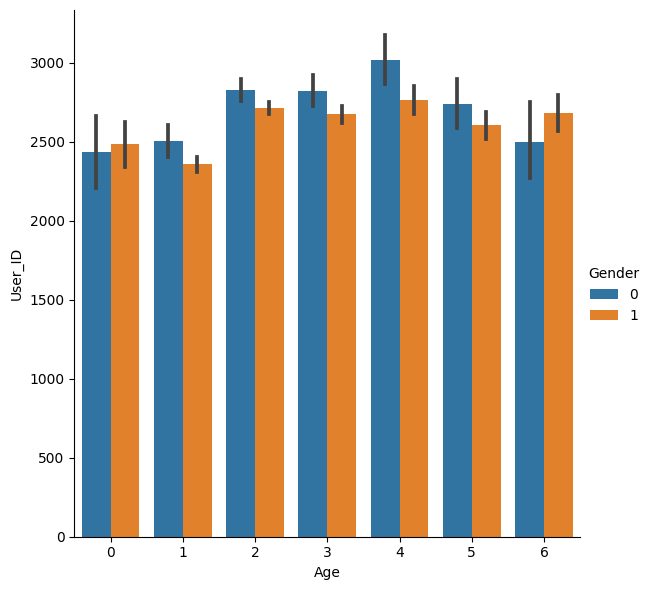

In [27]:
sns.catplot(data=data, x='Age', y='User_ID', hue='Gender', kind='bar', height=6)

###Inferences from the Plot:
1. The most frequent purchases came from the females having user ids that belong to age category 4(36-45)
2. The least frequent purchases came from the males of the age category 1(18-25), and females of age category 0(0-17).

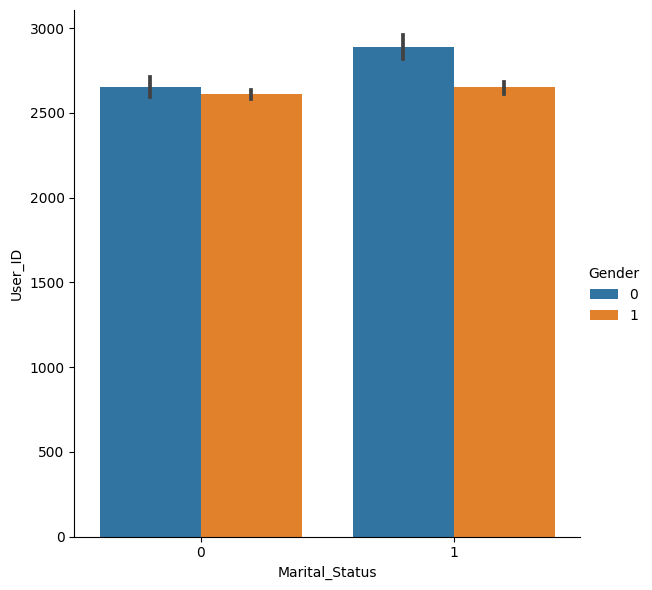

In [28]:
sns.catplot(data=data, x='Marital_Status', y='User_ID', hue='Gender', kind='bar', height=6)

### the gender ratio in unmarried customers is almost similar, whereas the married customers have a sightly higher number of females in the lot.

In [83]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_1'])

KeyError: ignored

<Figure size 1000x500 with 0 Axes>

### The product_category_1 sees a great rise of product category 1 and diminishes with the other products. The other considerable categories are 5, 2, 3, 6, 8, etc.

<Axes: xlabel='Product_Category_2', ylabel='count'>

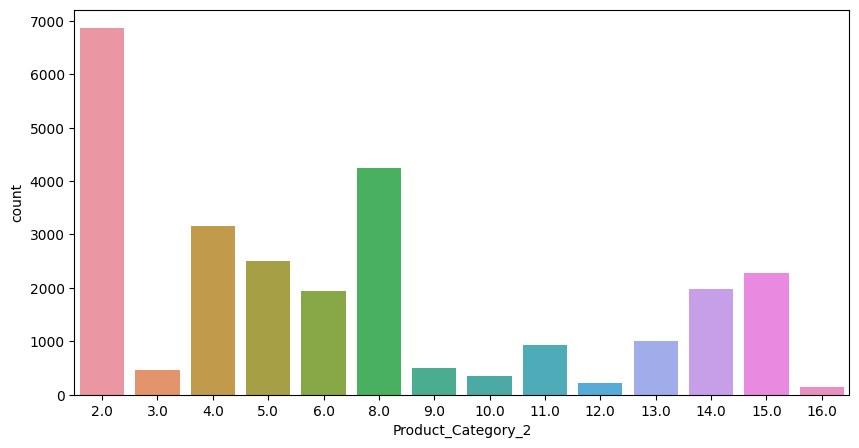

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['Product_Category_2'])

### Product_Category_2 sees a considerate balance among categories. With category 2 topping the charts, and other considerable categories are 8, ,4,5,6,14,15,etc.

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_3'])

KeyError: ignored

<Figure size 1000x500 with 0 Axes>

### For product_category_3, the balance is towards the end with 16 topping the charts, and other considerable categories are 15, 14, 5, 8, 9, 17, etc.

In [82]:
plt.figure(figsize=(10,5))
sns.countplot(data['Occupation'])

KeyError: ignored

<Figure size 1000x500 with 0 Axes>

### occupation also sees a constant balance with 4 topping the chart, and other categories in the considerable amount with 0,1,2,7,12,17,20.

In [81]:
plt.figure(figsize=(10,5))
sns.countplot(data['Stay_In_Current_City_Years'])

KeyError: ignored

<Figure size 1000x500 with 0 Axes>

### Majority of the customers have stayed a year in the city.

<ipython-input-32-0a2b175eddea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Purchase'])


<Axes: xlabel='Purchase', ylabel='Density'>

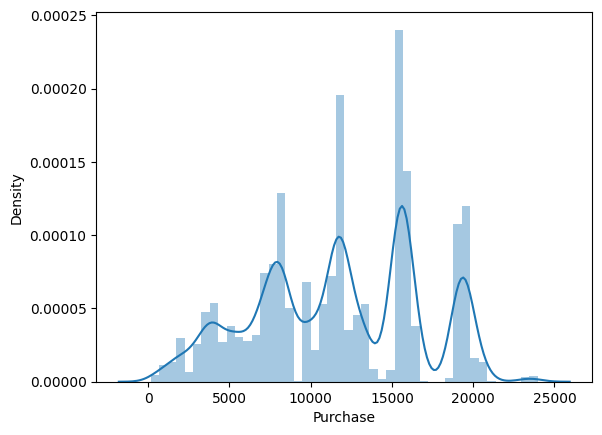

In [32]:
sns.distplot(data['Purchase'])

### Purchases is not accumulated in a range, rather varies in different intervals.

In [33]:
#checking the correlation of the features
corr_spearman = data.corr()
corr_pearson = data.corr(method='pearson')
corr_kendall = data.corr(method='kendall')

<Axes: >

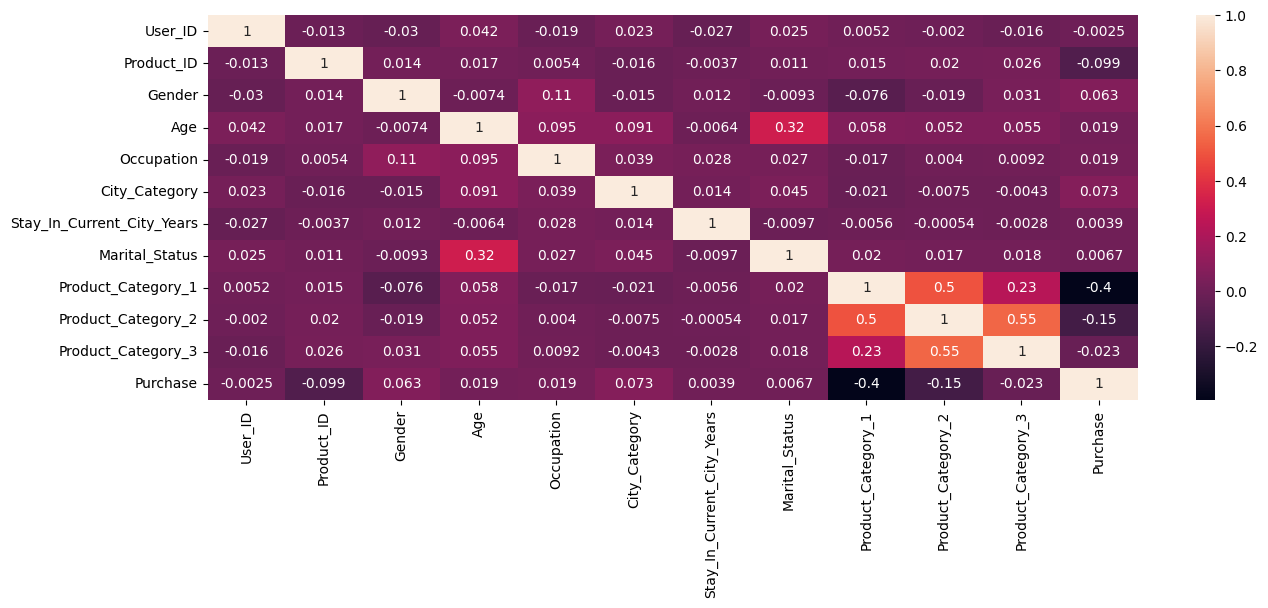

In [34]:
#spearman correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_spearman, annot=True)

<Axes: >

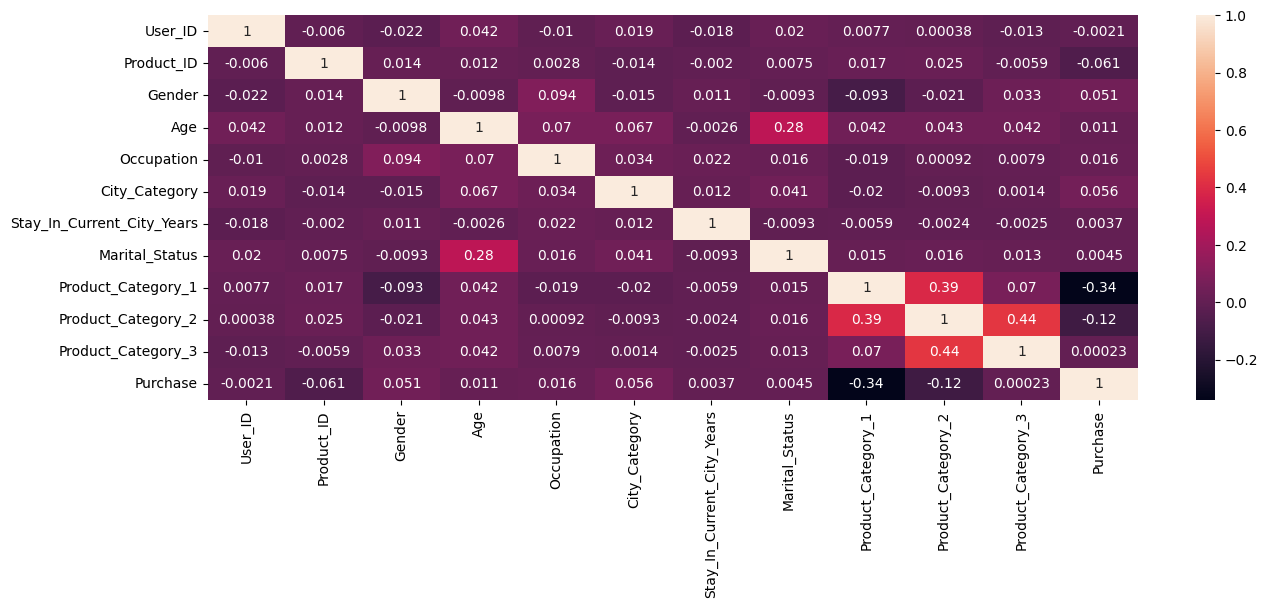

In [35]:
#kendall correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_kendall, annot=True)

<Axes: >

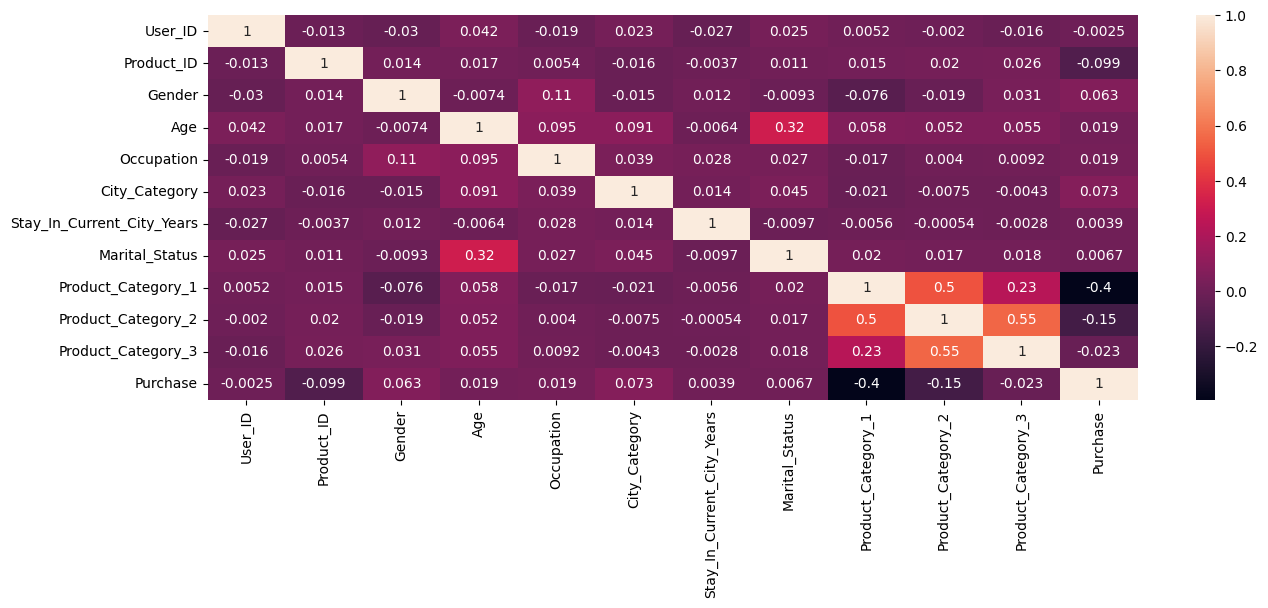

In [36]:
#pearson correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_pearson, annot=True)

## Statistical Analysis

### One Sample Test For Mean
let's Suppose, it was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?

In [37]:
data['Age']

1        0
6        4
13       2
14       5
16       5
        ..
87159    1
87160    1
87161    1
87168    1
87179    2
Name: Age, Length: 26568, dtype: int64

In [38]:
#null hypothesis - The mean is 10000
#alternate hypothesis - The mean is not 10000

In [39]:
new_data = data.loc[(data['Age'] == 1) & data['Gender'] == 1]

In [40]:
new_data.shape

(4087, 12)

In [41]:
sample_size = 1000
sample = new_data.sample(sample_size,random_state=0)

In [42]:
sample

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
68657,4277,381,1,1,4,2,3,0,1.0,2.0,6.0,11493.0
69868,4472,3242,1,1,10,2,4,0,2.0,3.0,4.0,9822.0
52467,1902,649,1,1,4,2,3,0,5.0,9.0,14.0,5409.0
41534,388,1195,1,1,0,1,3,0,1.0,2.0,16.0,11480.0
74008,5124,898,1,1,0,1,2,1,1.0,2.0,5.0,19592.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8679,1273,642,1,1,14,1,3,0,1.0,15.0,17.0,19609.0
33948,4966,2090,1,1,4,2,4,1,1.0,2.0,9.0,11670.0
79883,294,1304,1,1,4,1,4,0,1.0,11.0,15.0,7833.0
74452,5205,1677,1,1,7,0,1,0,5.0,8.0,14.0,6950.0


In [43]:
pos_mean = 10000

In [44]:
sample_mean = sample['Purchase'].mean()
print(sample_mean)

11854.092


In [45]:
#one sample t-test
from scipy.stats import ttest_1samp

In [46]:
ttest_1samp(sample['Purchase'], pos_mean)

TtestResult(statistic=11.34087622214862, pvalue=3.9692088935289514e-28, df=999)

In [47]:
t_stat, p_value = ttest_1samp(sample['Purchase'], pos_mean)
print(t_stat, p_value)

11.34087622214862 3.9692088935289514e-28


In [48]:
#P-value is less than 0.05, reject the null hypothesis.
#therefore, the mean purchase for men aged 18-25 is not 10000.

### One Sample Test for Proportion
Let's Suppose, It was observed that the percentage of women that spend more than 10000 was 35%. Is it still the same?

In [49]:
#null hypothesis - proportion is 35%.
#alternate hypothesis - proportion is not 35%.

data_new = data.loc[(data['Purchase'] > 10000)]

In [50]:
data_new.shape

(16270, 12)

In [51]:
 data_new['Gender'].value_counts()

1    12928
0     3342
Name: Gender, dtype: int64

In [52]:
data_new['Gender'].value_counts()[0]

3342

In [53]:
#No of women in the sample
count = data_new['Gender'].value_counts()[0]

#number of observations
nobs = len(data_new['Gender'])

#hypothesised value/observed p value
p0 = 0.35

In [54]:
data_new['Gender'].value_counts()/nobs

1    0.794591
0    0.205409
Name: Gender, dtype: float64

In [55]:
#one sample z test
from statsmodels.stats.proportion import proportions_ztest

In [56]:
z_stat, p_val = proportions_ztest(count=count,
                                  nobs=nobs,
                                  value=p0,
                                  alternative="two-sided",
                                  prop_var=False)
print(z_stat, p_val)

-45.65144345605375 0.0


In [57]:
#p-value is less than 0.05, reject the null hypothesis.
#the proportion of women spending more than 10000, is not 35%.

### Two Sample test for Means
Is the average purchase made by men and women of the age 18-25 same?

In [58]:
#null hypothesis - average spends are equal
#alternate hypothesis - average spends are not equal

data_men = data.loc[(data['Gender'] == 1)& (data['Age'] == 1)]
data_women = data.loc[(data['Gender'] == 0) & (data['Age'] == 1)]

In [59]:
data_men.shape

(4087, 12)

In [60]:
data_women.shape

(1162, 12)

In [61]:
#creating samples
data_men_sample = data_men.sample(500, random_state=0)
data_women_sample = data_women.sample(500, random_state=0)

In [62]:
#checking variances of the two samples
print(data_men_sample.Purchase.var())
print(data_women_sample.Purchase.var())

25264738.690545093
27058867.5118998


In [63]:
#sample means
print(data_men_sample.Purchase.mean())
print(data_women_sample.Purchase.mean())

12133.094
10590.182


In [64]:
#computing f statistic
from scipy.stats import f
F = data_men_sample.Purchase.var()/data_women_sample.Purchase.var()
print(F)

0.9336953469850247


In [65]:
#calculating the degrees of freedom
df1 = len(data_men_sample) - 1
df2 = len(data_women_sample) - 1

print(df1, df2)

499 499


In [66]:
#p-value
import scipy
scipy.stats.f.cdf(F, df1, df2)

0.22189712116832838

In [67]:
#the p-value is greater than 0.05, do not reject the null hypothesis./ accept the null hypothesis
#the alternate hypothesis is not true. The equal variances.

In [68]:
#two sample t-test for unequal variances
from scipy.stats import ttest_ind

t_stat_2, p_val_2 = ttest_ind(data_men_sample.Purchase, data_women_sample.Purchase, equal_var=False)
print(t_stat_2, p_val_2)

4.769549108339366 2.121606248956355e-06


In [69]:
#we can reject the null hypothesis using the test statistic and since p-value is less than 0.05.
#the average purchases are not the same.

### Two Sample test for Proportion
Is the percentage of men who have spend more than 10000 same for the ages 18-25 and 26-35

In [70]:
#null hypothesis - Percentage of the men in the age groups is same
#alternate hypothesis - Percentage of the men in the age groups is not same

data_age1 = data.loc[(data['Age'] == 1) & (data['Purchase'] > 10000)]
data_age2 = data.loc[(data['Age'] == 2) & (data['Purchase'] > 10000)]

In [71]:
data_age1.shape

(3194, 12)

In [72]:
data_age2.shape

(6471, 12)

In [73]:
data_age1_sample = data_age1.sample(1000, random_state=0)
data_age2_sample = data_age2.sample(1000, random_state=0)

In [74]:
(data_age1_sample['Gender'] == 1).sum()

811

In [75]:
(data_age2_sample['Gender'] == 1).sum()

806

In [76]:
count = [(data_age1_sample['Gender'] == 1).sum(), (data_age2_sample['Gender'] == 1).sum()]

nobs = [(len(data_age1_sample)), len(data_age2_sample)]

In [77]:
count

[811, 806]

In [78]:
from statsmodels.stats.proportion import proportions_ztest
stat_2sample, p_value_2sample = proportions_ztest(count=count,
                                                  nobs=nobs,
                                                  value=0,
                                                  alternative='two-sided',
                                                  prop_var=False)

In [79]:
print(stat_2sample, p_value_2sample)

0.28413884138300327 0.776303981972239


In [80]:
#p value is more than 0.05, cannot reject the null hypthesis.
#therefore, Percentage of the men in the age groups is same